# LensFlare

LensFlare is an educational deep learning library for understanding neural networks. The code is based on work from the [Coursera deeplearning.ai course](https://www.coursera.org/specializations/deep-learning).

This notebook demonstrates the TensorFlow 2 implementation using the low-level `GradientTape` API for explicit gradient computation.

## Features
- **Metal GPU acceleration** on Apple Silicon Macs
- **Educational low-level API** showing explicit forward/backward propagation
- **sklearn-style interface** with `fit()`, `predict()`, `transform()`

In [1]:
from lensflare import TfNNClassifier, load_moons_dataset, check_gpu_available, plot_decision_boundary

# Check if Metal GPU is available (Apple Silicon)
check_gpu_available()

TensorFlow GPU devices available: 1
  - /physical_device:GPU:0


True

## Load the Moons Dataset

The moons dataset is a simple binary classification problem useful for visualizing decision boundaries.

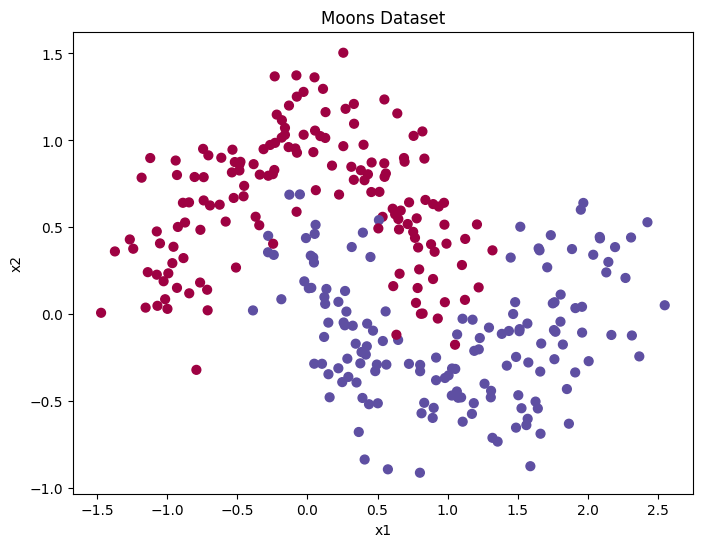

Data shape: X=(2, 300), y=(1, 300)


In [2]:
# Load data (set plot=True to visualize)
X_train, y_train = load_moons_dataset(n_samples=300, noise=0.2, seed=42, plot=True)
print(f"Data shape: X={X_train.shape}, y={y_train.shape}")

## Create and Train the Neural Network

The `TfNNClassifier` uses TensorFlow 2's `GradientTape` for explicit gradient computation, making it ideal for educational purposes.

### Parameters:
- `layers_dims`: Network architecture `[input_size, hidden1, hidden2, ..., output_size]`
- `optimizer`: `'gd'` (SGD), `'momentum'`, or `'adam'`
- `lambd`: L2 regularization strength
- `keep_prob`: Dropout keep probability (1.0 = no dropout)

In [3]:
# Define network architecture: 2 inputs -> 64 -> 32 -> 16 -> 1 output
layers_dims = [X_train.shape[0], 64, 32, 16, 1]

# Create classifier with Adam optimizer and L2 regularization
clf = TfNNClassifier(
    layers_dims=layers_dims,
    optimizer="adam",
    alpha=0.01,           # Learning rate
    lambd=0.01,           # L2 regularization
    keep_prob=0.9,        # Dropout (90% keep)
    num_epochs=2000,
    print_cost=True
)

# Train the model
clf.fit(X_train, y_train, seed=1)

2026-01-28 08:58:24.796217: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2026-01-28 08:58:24.796252: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-01-28 08:58:24.796258: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1769615904.796276 8241563 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1769615904.796302 8241563 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2026-01-28 08:58:25.070462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Cost after epoch 0: 1.205769
Cost after epoch 1000: 0.173674


## Evaluate Training Accuracy

In [4]:
# Get predictions and print accuracy
y_pred_train = clf.transform(X_train, y_train)

Training Accuracy: 0.966667


## Visualize the Decision Boundary

The decision boundary shows how the neural network separates the two classes.

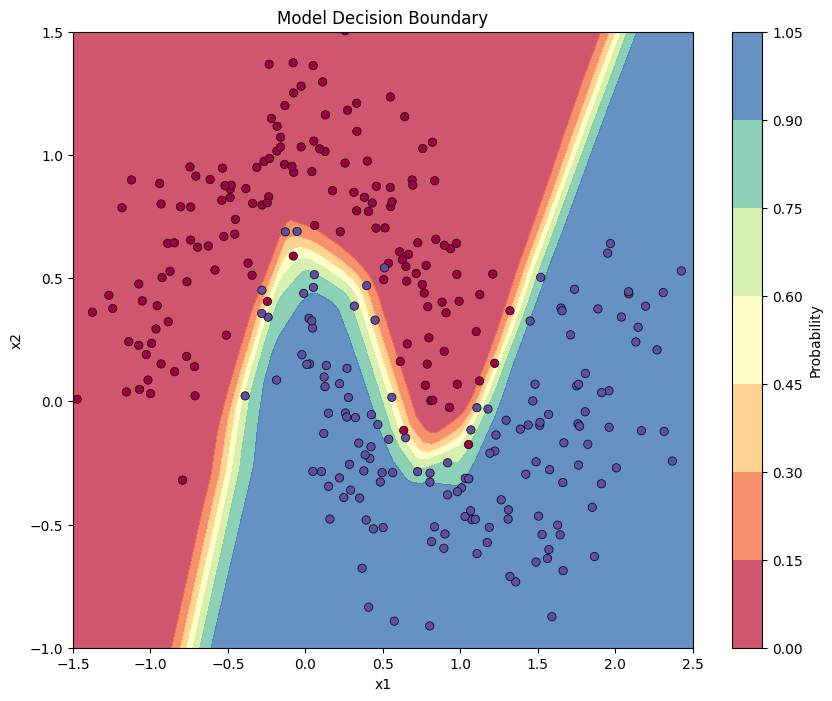

In [5]:
# Plot the decision boundary
plot_decision_boundary(clf, X_train, y_train)

## Plot Training Cost

Visualize how the loss decreased during training.

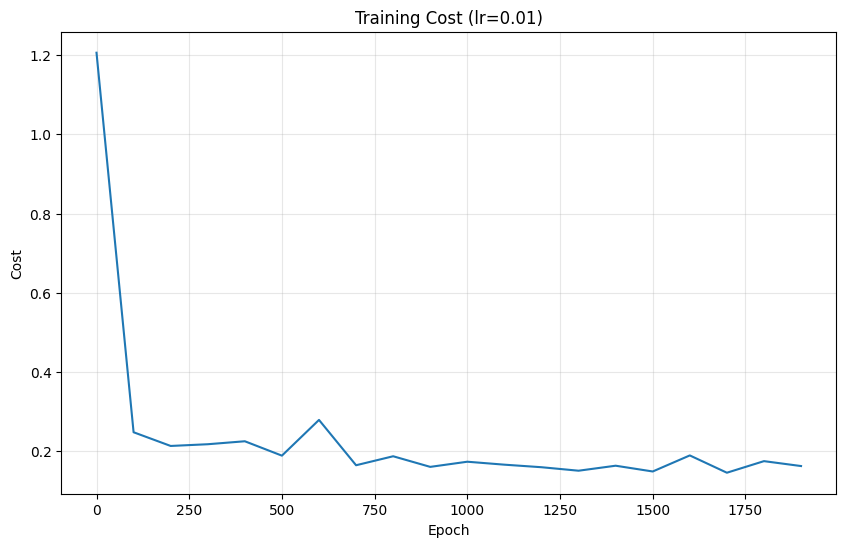

In [6]:
clf.plot_costs()

## Accessing Model Internals

For educational purposes, you can inspect the trained weights:

In [7]:
# View the learned parameters
for key, value in clf.parameters_.items():
    print(f"{key}: shape={value.shape}")

W1: shape=(64, 2)
b1: shape=(64, 1)
W2: shape=(32, 64)
b2: shape=(32, 1)
W3: shape=(16, 32)
b3: shape=(16, 1)
W4: shape=(1, 16)
b4: shape=(1, 1)
